In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')

df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [3]:
df.info()  ## pclass=passenger class, sibsp= sibling/spouse, parch=parents/children,embarked=boarding location
           ## Null entries=missing data in age,cabin, embarked
           ## String data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## EDA

In [5]:
target_cols= 'Survived'
cat_cols=['Pclass','Sex','Embarked']
num_cols=['Age','SibSp','Parch','Fare']
drop_cols=['PassengerId','Name','Cabin','Ticket']

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df['PassengerId'].nunique()  ##drop passenger id

891

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


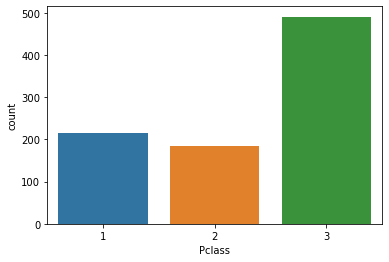

Sex
male      577
female    314
Name: Sex, dtype: int64


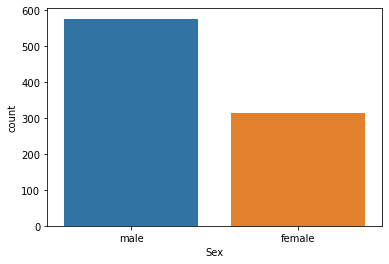

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


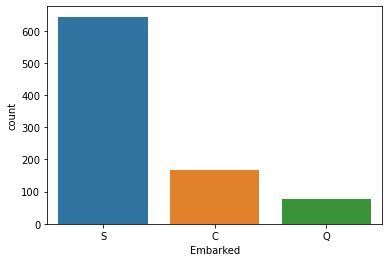

In [8]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts())  
    sns.countplot(data=df,x=col)
    plt.show()
for col in cat_cols:
    cat_analyze(col)    



Age


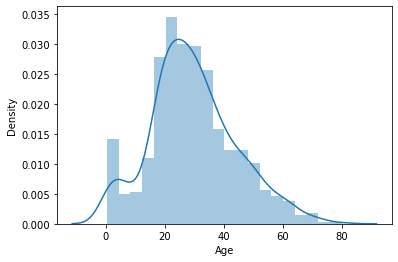

SibSp


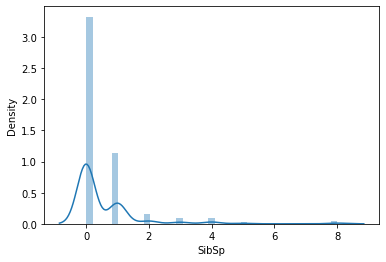

Parch


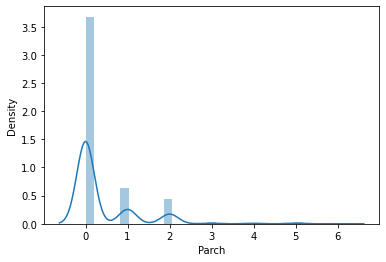

Fare


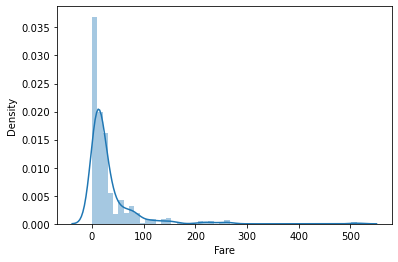

In [9]:
def num_analyze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()
for col in num_cols:
    num_analyze(col)    
  

## bivariate

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


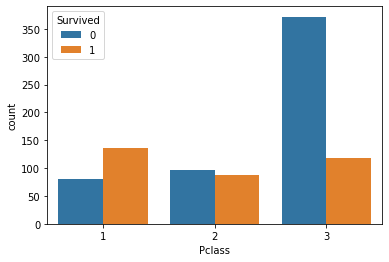

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


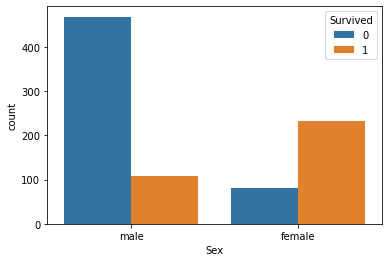

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


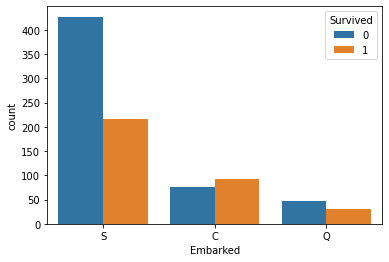

In [10]:
def cat_bivariate(col):
    print(col)
    print(df.groupby(target_cols)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target_cols)
    plt.show()
for col in cat_cols:
    cat_bivariate(col)    

Age


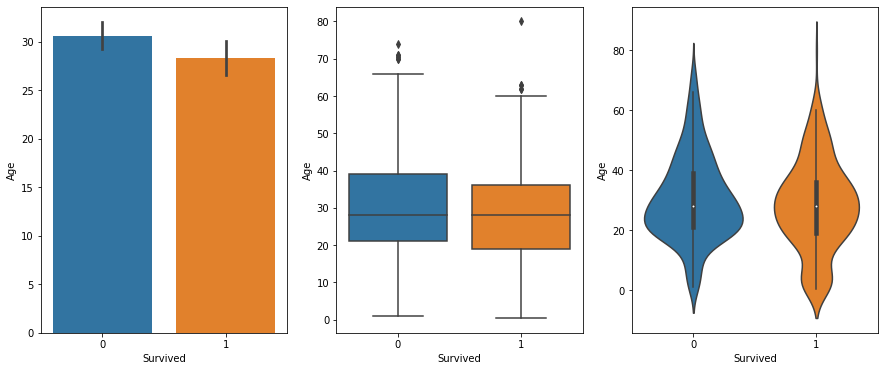

SibSp


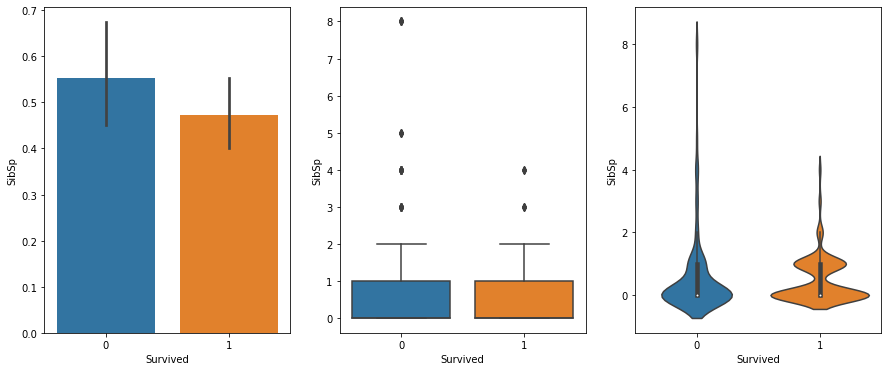

Parch


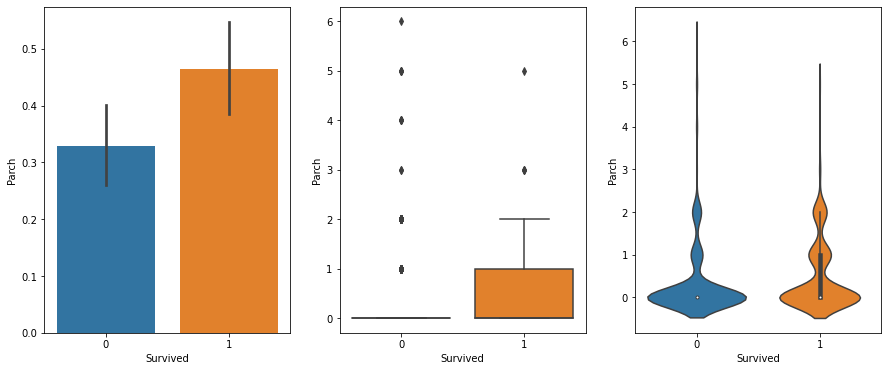

Fare


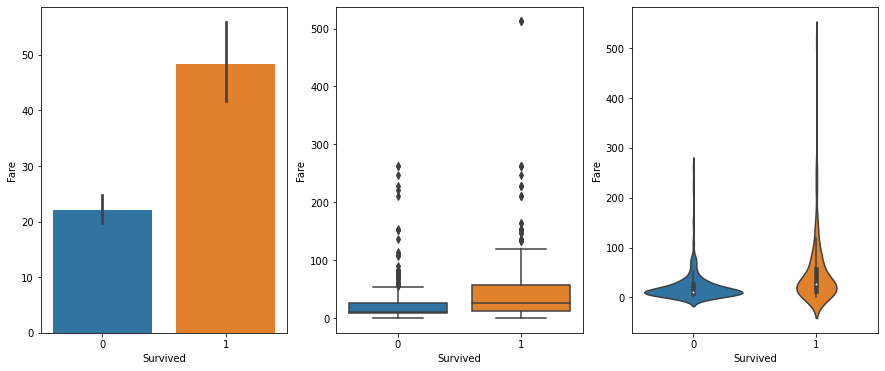

In [11]:
def cat_bivariate(col):
    print(col)
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1)
    sns.barplot(data=df,x=target_cols,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_cols,y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=target_cols,y=col)
    plt.show()
for col in num_cols:
    cat_bivariate(col)    

<AxesSubplot:>

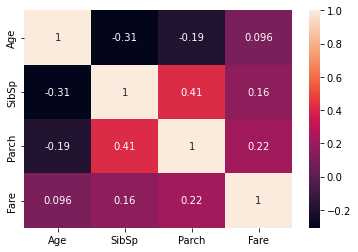

In [12]:
sns.heatmap(df[num_cols].corr(),annot=True)

## multivariate

In [13]:
from random import choice
p_list=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']


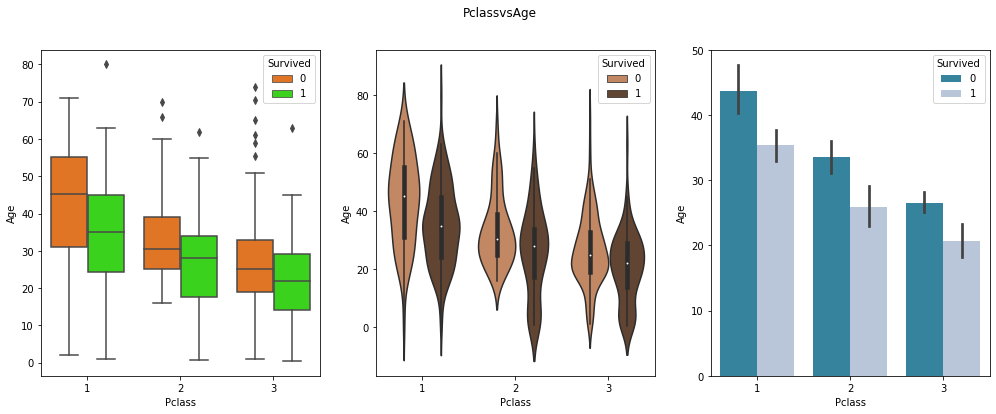

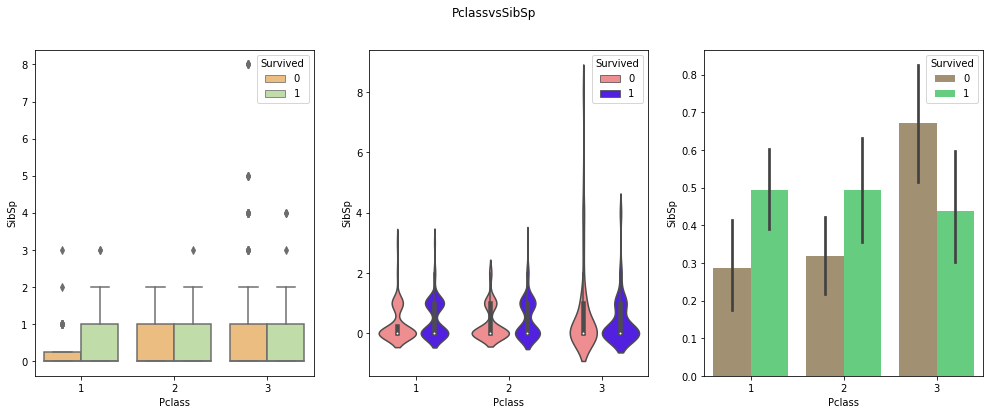

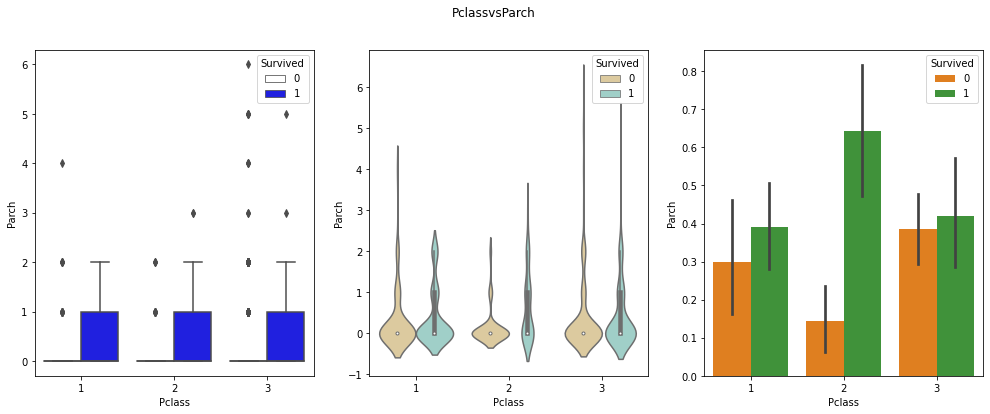

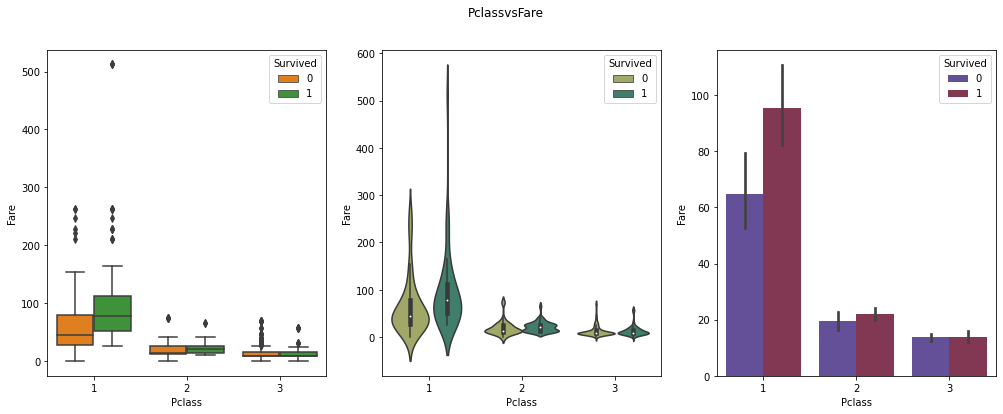

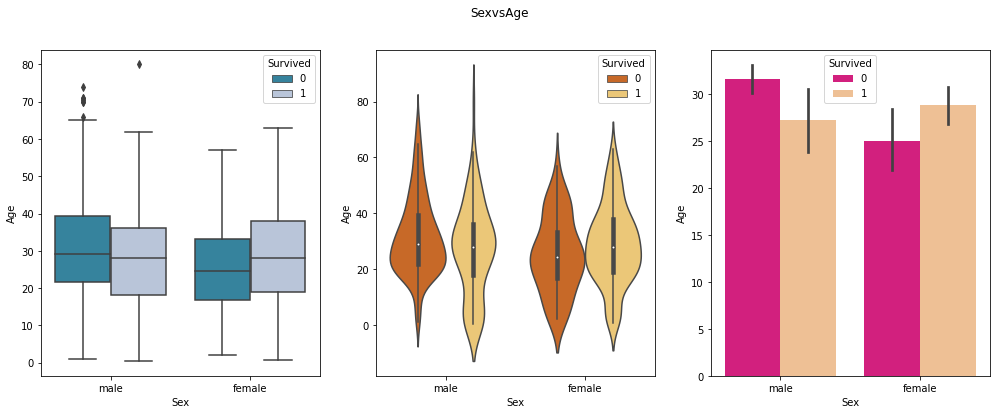

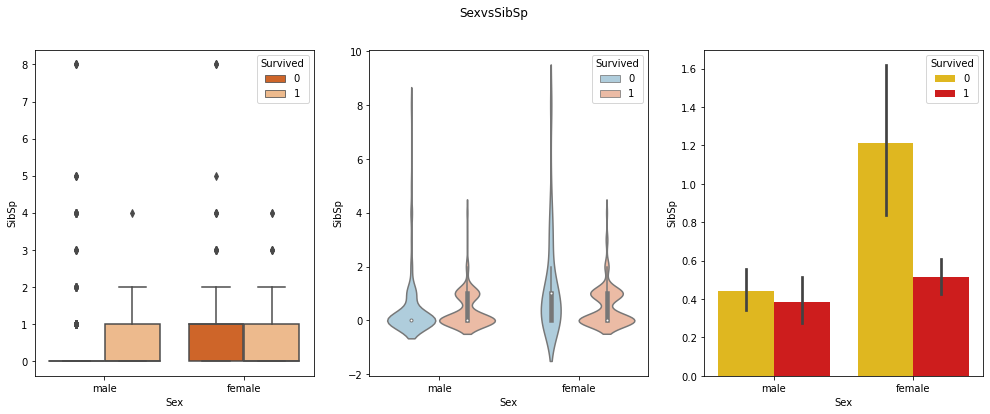

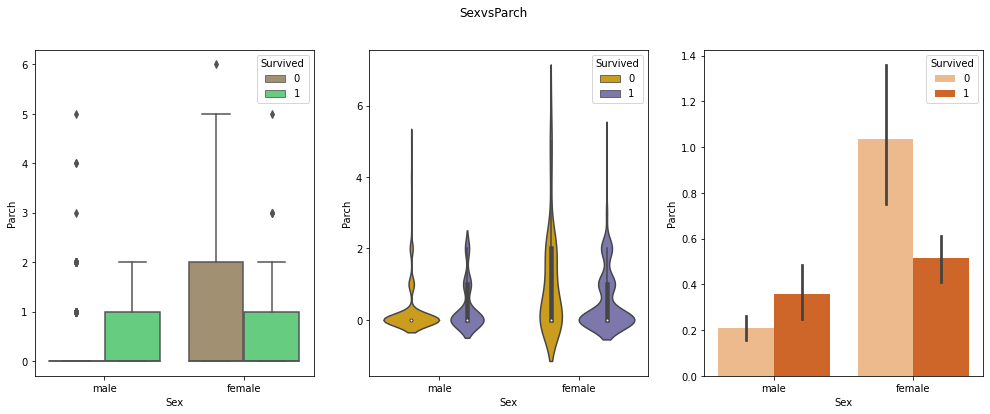

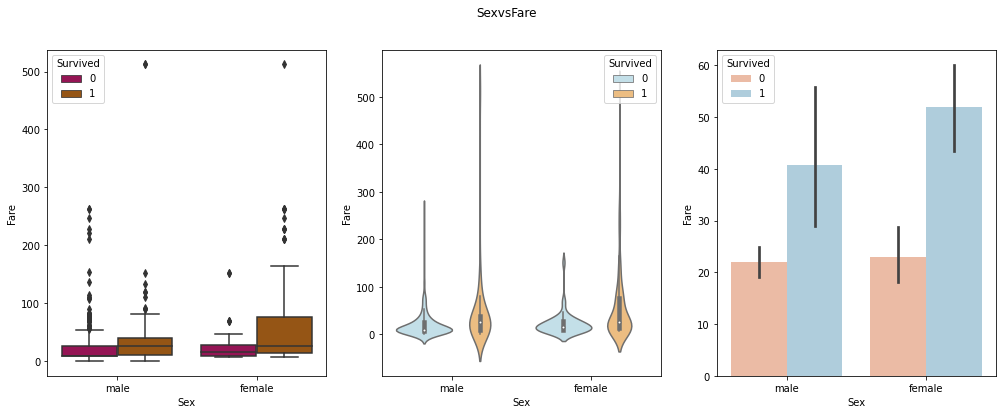

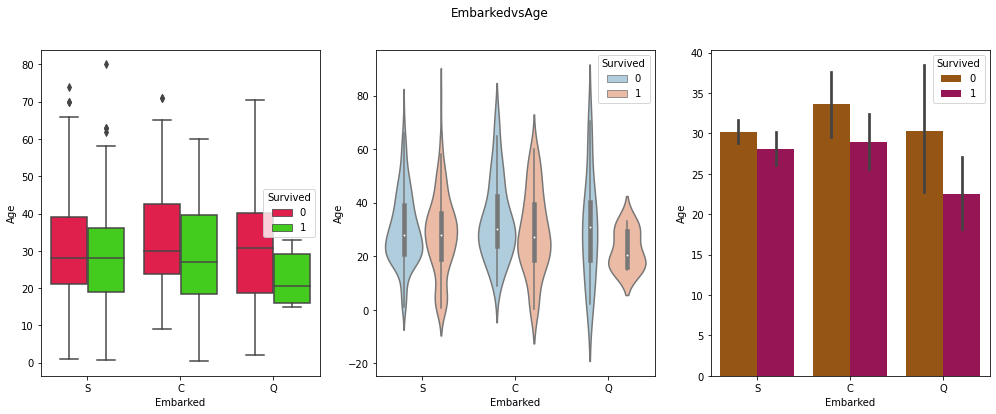

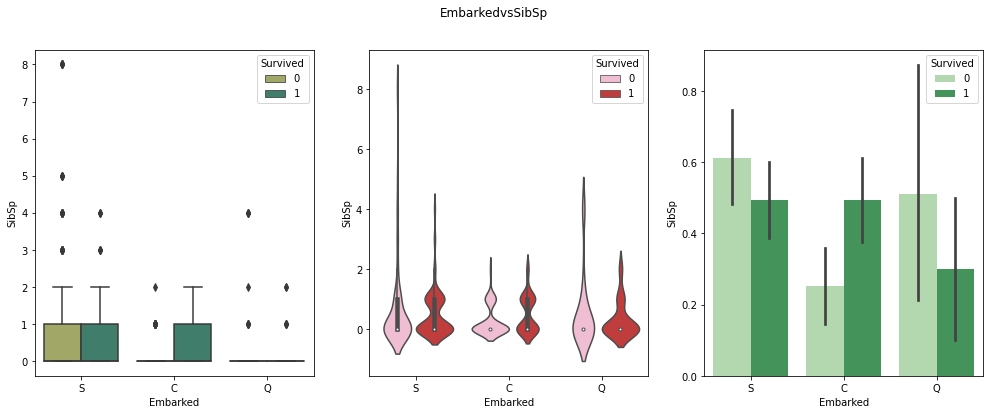

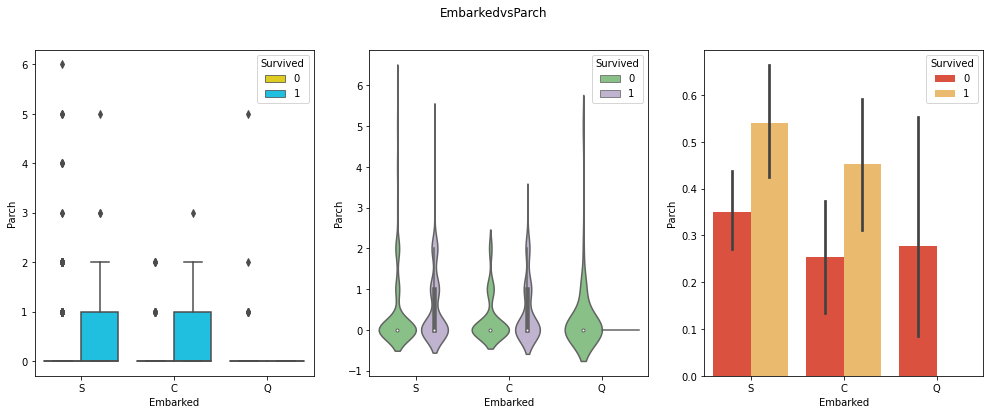

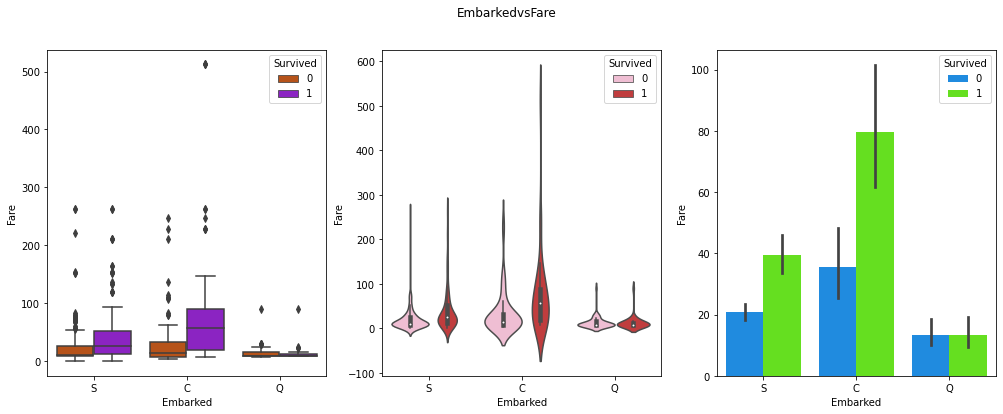

In [14]:
for col in cat_cols:
    if col==target_cols:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(17,6))
        plt.suptitle(f'{col}vs{ncol}')
        plt.subplot(1,3,1)    ############# 1-line,2-total graphs, 3-type of graph 
        sns.boxplot(data=df, x=col,y=ncol,hue=target_cols,palette=choice(p_list))
        plt.subplot(1,3,2)
        sns.violinplot(data=df, x=col,y=ncol,hue=target_cols,palette=choice(p_list))
        plt.subplot(1,3,3)
        sns.barplot(data=df, x=col,y=ncol,hue=target_cols,palette=choice(p_list))
        plt.show()

In [15]:
df.drop(drop_cols,axis=1,inplace=True)

### missing data identification

In [16]:
pd.isnull(df) ## where missing entries are?

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


In [17]:
pd.isnull(df).sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
100*pd.isnull(df).sum()/len(df)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

*Missing data strategy:-
- Idnetify missing data
- Discard the columns having too much of missing data (>25%)
- Treat/impute the missing entries (fill with dummy/fake data which dosen't impact overall data)
  -fill using mean values(numrical data)
  - fill using some imputers(categorical data)
- Discard the rows having missing entries, if the missing entries are too less(<5%>)


<AxesSubplot:>

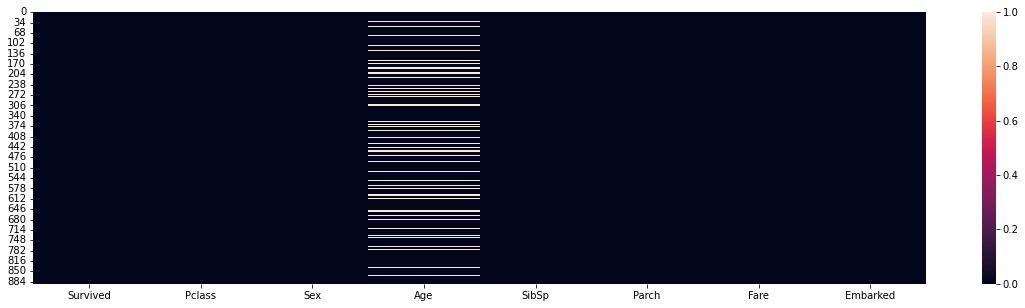

In [19]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.isnull(df))

In [20]:
## 
# df.drop('Cabin',axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<AxesSubplot:>

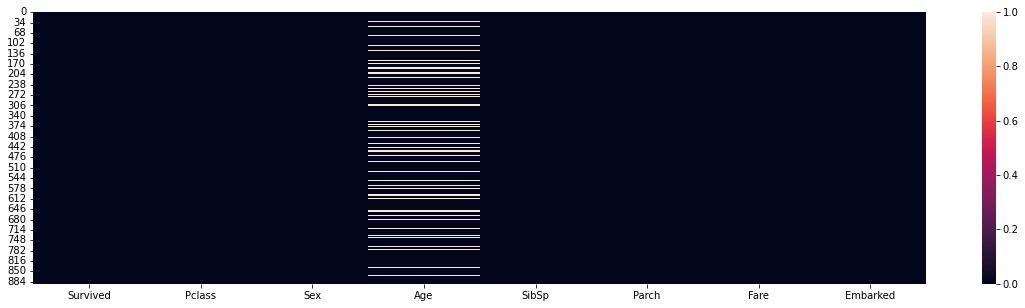

In [22]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.isnull(df))

In [23]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

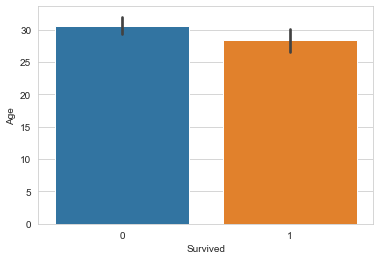

In [24]:
sns.barplot(data=df, x='Survived',y='Age')  ## Age impact on survival

In [25]:
df['Age'].mean()

29.69911764705882

In [26]:
df['Age'].fillna(df['Age'].mean()).mean()

29.699117647058763

#### relationship of age with other columns:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

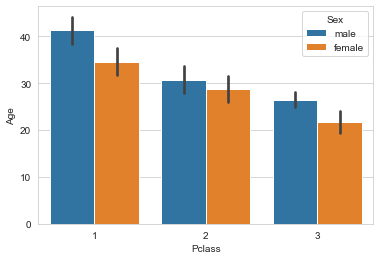

In [27]:
sns.barplot(data=df,y='Age',x='Pclass',hue='Sex')

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
## Impute the fake entries in missing age information
def age_imputer(data):
    age =data['Age']
    pclass=data['Pclass']
    sex=data['Sex']

    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass)&(df['Sex']==sex)].mean()
    else:
        return age  
df['Age']=df.apply(age_imputer,axis=1)          

<AxesSubplot:>

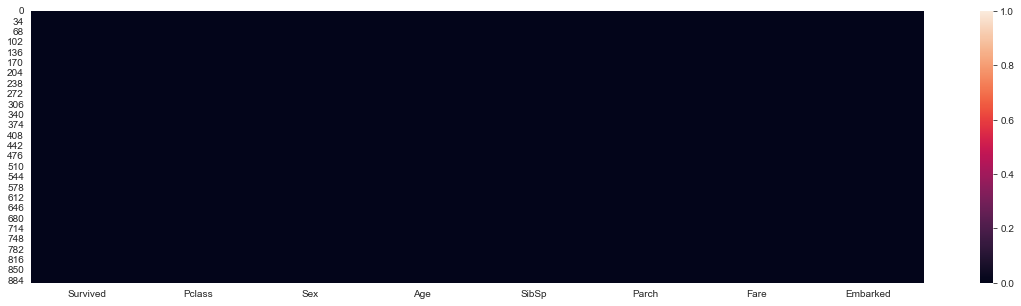

In [30]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.isnull(df))

In [31]:
## dropping few misisng entries which were very less (in embarked column) 
df.dropna(axis=0,inplace=True)

<AxesSubplot:>

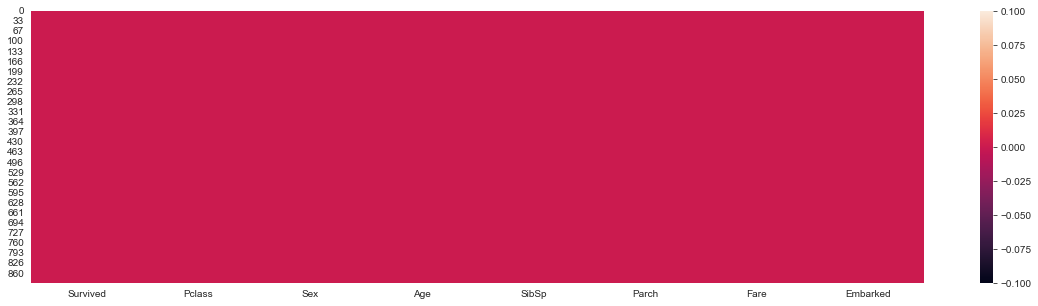

In [32]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.isnull(df))

In [33]:
100*pd.isnull(df).sum()/len(df)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

## string data preprocessing /creating dummy for string

In [34]:
data=pd.get_dummies(df).drop('Sex_female',axis=1)

In [35]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [36]:
target =data[target_cols]
features = data.drop(target_cols,axis=1)

In [37]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


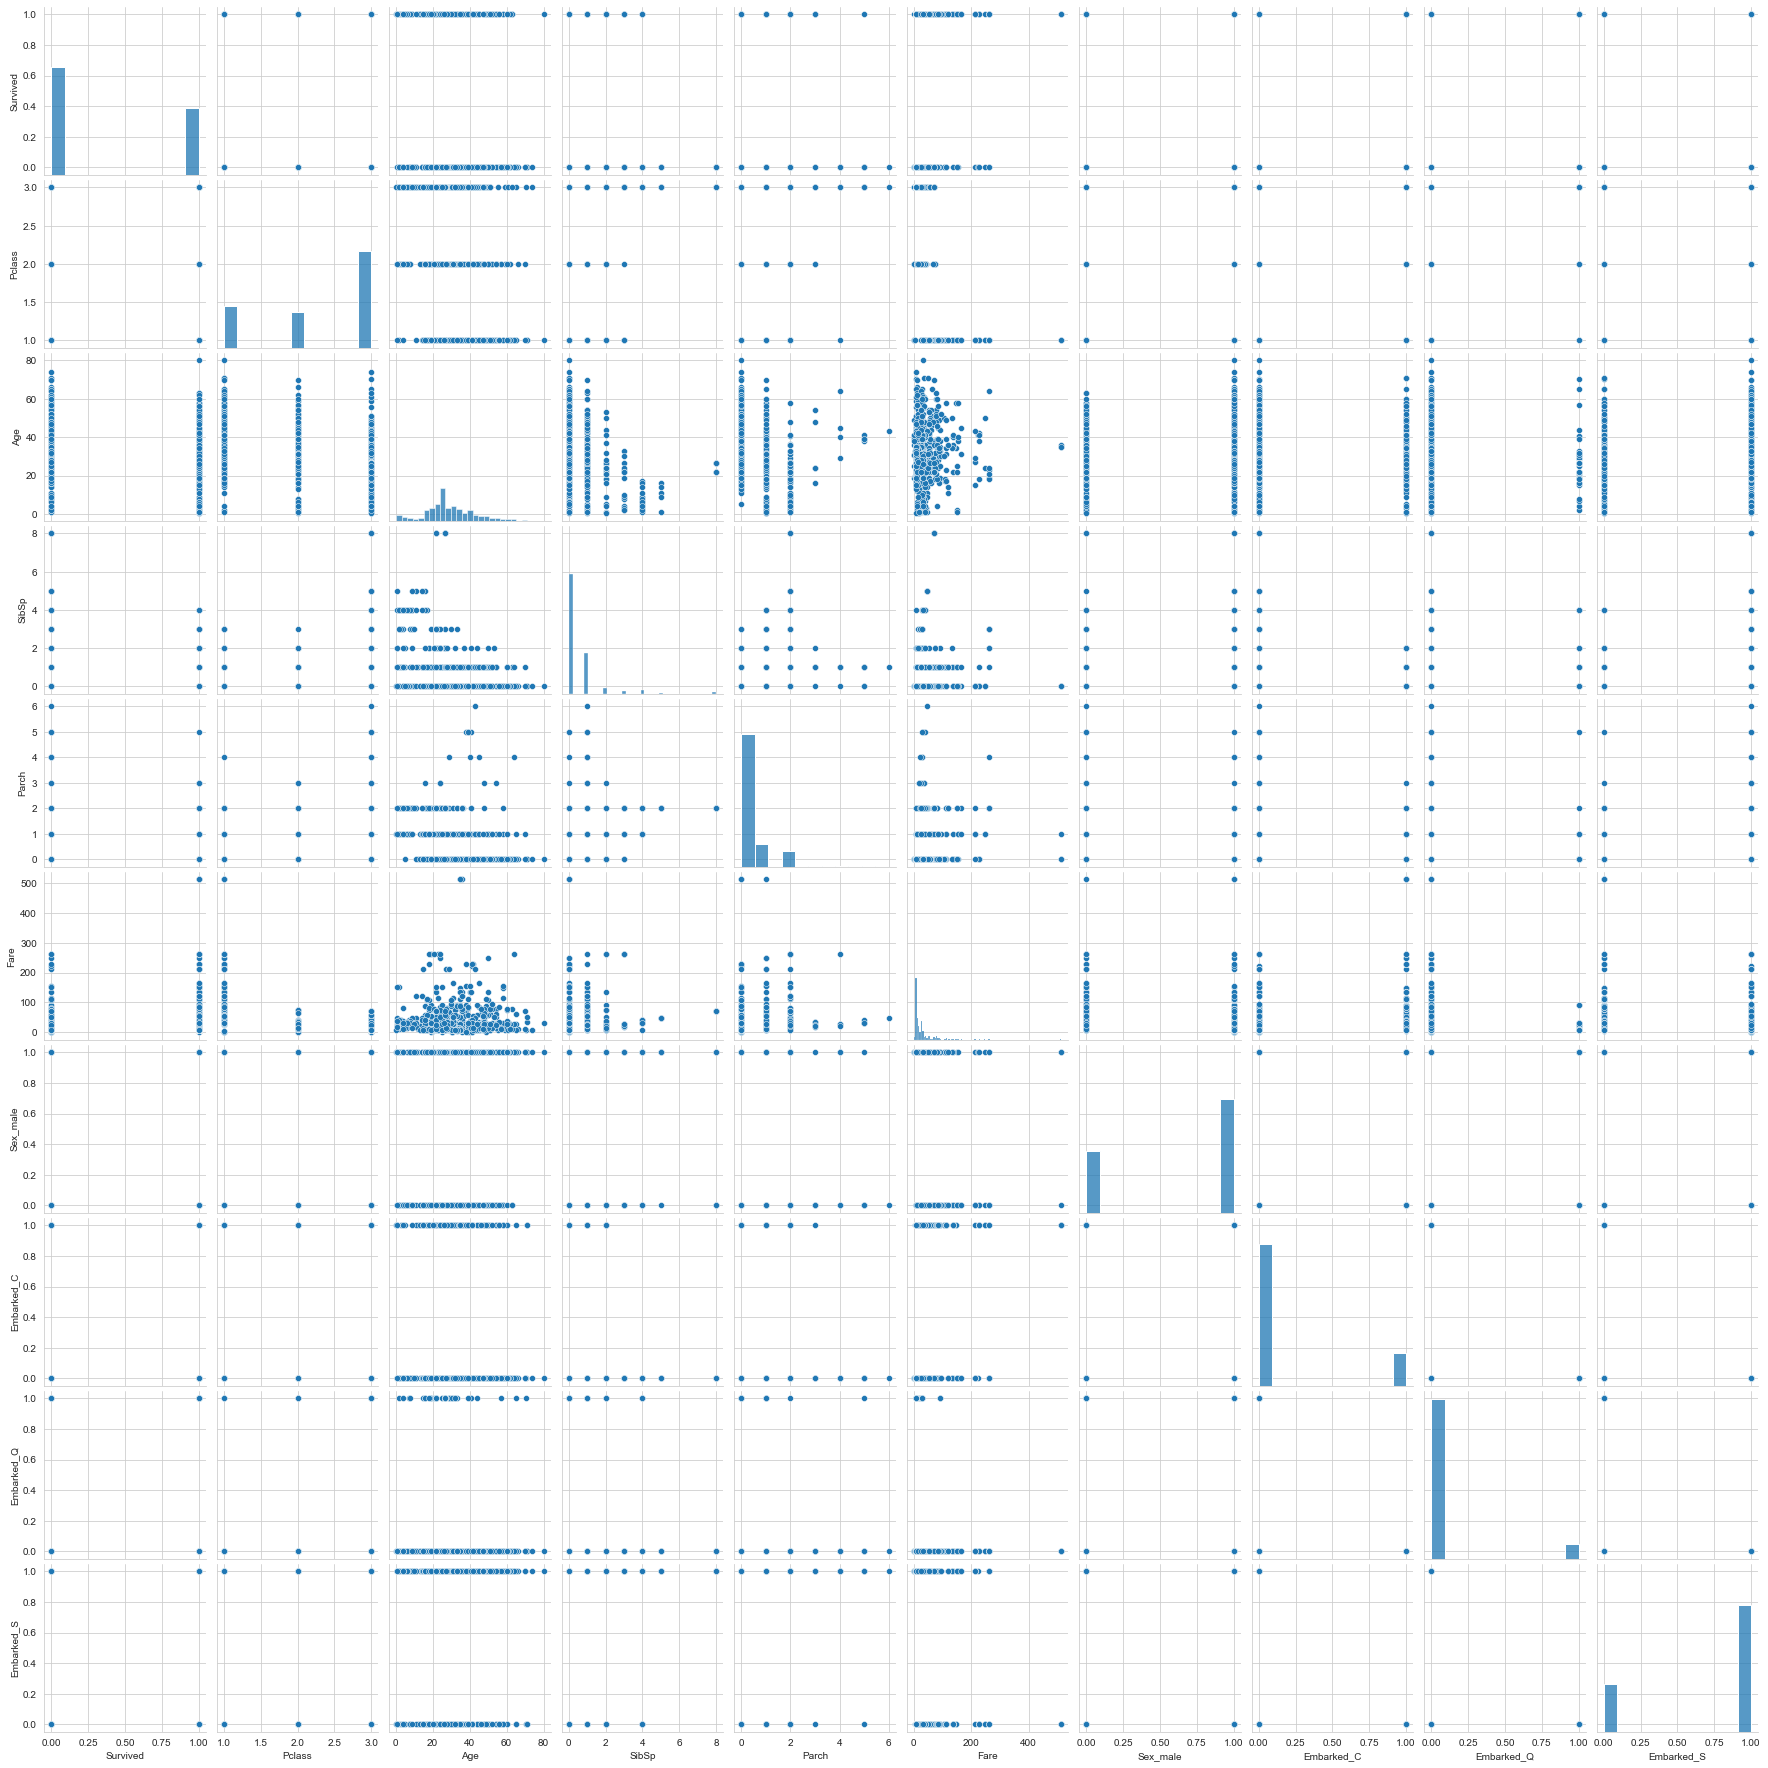

In [39]:
sns.pairplot(data)  ## both numerical data for logistic regression to show

### Why we decided logistic regression
1. Initially we thought of doing with pairplot, but since it's a categorical data in target, it's not helpful
2. Since its <b> binary categorical target <b> and features are mixtures of <b> numerical <b> and categorical both ,then i can thinl of logistic regression (classification)

## machine learning template

### data splitting

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest= train_test_split(features,target, test_size=0.25, random_state=101 )

### model creation & training

In [41]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

### model evaluation

In [42]:
print (round(100 * model.score(xtest, ytest)),'%')

83 %


In [43]:
ytest.value_counts()  

0    136
1     87
Name: Survived, dtype: int64

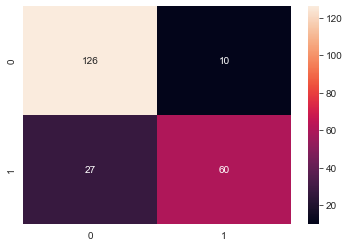

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [44]:
## Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
ytest_pred= model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred), annot= True, fmt='d')
plt.show()

print(classification_report(ytest, ytest_pred))

In [45]:
pd.Series(ytest_pred).value_counts()

0    153
1     70
dtype: int64

### Improving the model:=

1. by balancing the dataset
2. by hyperparameter tuning
3. cross validation

In [46]:
### Putting class weights/ hyperparam
model= LogisticRegression(class_weight={0 : 0.3, 1 : 0.7} ,random_state=101)
model.fit(xtrain, ytrain)

print(classification_report(ytest, ytest_pred))

## this method did not work

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [47]:
# hyperparam
for algo in ['newton-cg', 'lbfgs','liblinear','sag','saga']:
    print(algo)
    model_algo= LogisticRegression(random_state=101, solver=algo, tol=1, C=1)
    model_algo.fit(xtrain, ytrain)

    print(classification_report(ytest,model_algo.predict(xtest)))

newton-cg
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

lbfgs
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

liblinear
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       136
           1       0.75      0.34      0.47        87

    accuracy                           0.70       223
   macro avg       0.72      0.64      0.63       223
weighted avg       0.71      0.70      0.67     

In [48]:
## This model is not improving so we should not consider it as the score was low as compared to 

### decision tree algorithm

In [49]:
xtrain,xtest, ytrain, ytest

(     Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_C  \
 127       3  24.000000      0      0   7.1417         1           0   
 133       2  29.000000      1      0  26.0000         0           0   
 619       2  26.000000      0      0  10.5000         1           0   
 439       2  31.000000      0      0  10.5000         1           0   
 374       3   3.000000      3      1  21.0750         0           0   
 ..      ...        ...    ...    ...      ...       ...         ...   
 576       2  34.000000      0      0  13.0000         0           0   
 840       3  20.000000      0      0   7.9250         1           0   
 338       3  45.000000      0      0   8.0500         1           0   
 524       3  26.507589      0      0   7.2292         1           1   
 865       2  42.000000      0      0  13.0000         0           0   
 
      Embarked_Q  Embarked_S  
 127           0           1  
 133           0           1  
 619           0           1  
 439      

In [50]:
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier().fit(xtrain, ytrain)


In [51]:
print(classification_report(ytest,model_dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       136
           1       0.68      0.72      0.70        87

    accuracy                           0.76       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.76      0.76       223



### random forest classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier().fit(xtrain, ytrain)
print(classification_report(ytest,model_rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       136
           1       0.79      0.75      0.77        87

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



In [54]:
pd.DataFrame(model_dt.feature_importances_,index=xtrain.columns, columns=['Importance']).sort_values (by= 'Importance', ascending=False)

,Importance
Sex_male,0.298897
Age,0.245014
Fare,0.243926
Pclass,0.099957
SibSp,0.054961
Parch,0.029066
Embarked_S,0.014031
Embarked_C,0.009778
Embarked_Q,0.004369


In [55]:
imp_cols=['Sex_male', 'Fare', 'Age']

In [56]:
model_dt2= DecisionTreeClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest, model_dt2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       136
           1       0.63      0.67      0.65        87

    accuracy                           0.72       223
   macro avg       0.70      0.71      0.71       223
weighted avg       0.72      0.72      0.72       223

